# Introduction to Python Packages

Contributors: Daniel Lay

This is Part 2 of an introductory notebook. This assumes that you understand functions, lists, print statements, and so on, at least at the level of the first Jupyter notebook.

For this notebook, you don't need to install anything on your computer. In general, you will want to install all of the packages used below; a guide to Anaconda is linked in the resources page of the previous notebook.

As a simple bit of motivation, suppose we want to compute the eigenvalue decomposition of a matrix (you will learn about this in the summer course if you're unfamiliar). There are a number of algorithms metioned on the Wikipedia page, https://en.wikipedia.org/wiki/Eigenvalue_algorithm, but how do you know which one to use? Do you even want to write your own? After all, doing so is time-consuming and error-prone.

The answer is, no: you do not have to write your own! Python lets you use what is called a *package*, or a collection of functions/classes, whenever you want. This makes it easy to use pre-written code for common things you might want to do, such as:
- Matrix operations (transposes, inverses, eigenvalue decomposition, etc.)
- Plotting data (scatterplot, contour plot, 3d graphics, etc.)
- Using special functions (trigonometric, polynomials, special functions, etc.)
- Reading to/writing from a file

So, for an enormous amount of things you want to do, you basically don't have to write *any code at all*. These applications, and many more, will be detailed throughout the summer course, and the rest of the Jupyter notebooks. For now, let's first learn how to use a package.

## Importing packages; numpy

The first package we'll use is called 'numpy', which stands for numerical python. It is used for matrix operations. To use a package, we *import* it, using the 'import' statement. We can import a package and call it something else, using the following code:

In [1]:
import numpy as np

Now, 'np' behaves like the classes you've been introduced to in the previous notebook. To understand this, let's use an example. You're already familiar with a list, and numpy has an analogous object, an array:

In [2]:
my_list = [1,2,3]
my_array = np.array([1,2,3])

print('my_list:',my_list)
print('my_array:',my_array)

my_list: [1, 2, 3]
my_array: [1 2 3]


We created an instance of an array by calling 'np.array', with a list as an argument. You see that this is something you've already encountered: the class method 'array' is accessed using the '.' operator, just as in the introduction to classes from the previous notebook.

Now, 'my_array' contains the same information as 'my_list'. So why do we use it? Suppose we want to perform algebraic operations on a set of numbers - say, for instance, we want to square them. With an array, it is trivial: you simply use the '\*\*' operator on the array:

In [3]:
print('my_array squared:',my_array**2)

my_array squared: [1 4 9]


That couldn't be any easier! If you're feeling confident, try to accomplish the same with 'my_list' (I won't show it - it's basically always better to use an array).

The same is true for a whole lot of operations, such as multiplication by a number:

In [4]:
print('2 * my_array:',2*my_array)

2 * my_array: [2 4 6]


It is also true for many elementary functions, such as $\sin(x)$. You'll see many of these operations as you read the other notebooks (such as the linear algebra notebook), so I won't dwell on them here.

Commonly in physics, your data is multi-dimensional - for instance, you could have data defined on an $(x,y)$ grid. The natural way to store this data, then, is to have an object that uses two indices: one for the $x$ coordinate, and another for the $y$ coordinates. Numpy makes this easy:

In [5]:
my_2d_array = np.array([[1,2,3],
                        [4,5,6]])

print('my_2d_array:')
print(my_2d_array)

my_2d_array:
[[1 2 3]
 [4 5 6]]


If you're clever, you notice that we create this array by feeding in a list of lists. The reason to use an array instead is, again, for the ease of algebraic operations. These are accomplished the same as with 'my_array'.

There are a lot of ways to make arrays. An incomplete list includes the following:

In [6]:
#An array of ones, of length 5
print('np.ones:',np.ones(5))

#The integers from 0 to 5, similar to Python's 'range' statement
print('np.arange:',np.arange(5))

#Linearly spaced values from -1 to 1, for a total of 11 values
print('np.linspace',np.linspace(-1,1,11))

#Random numbers
print('np.random.rand',np.random.rand(5))

np.ones: [1. 1. 1. 1. 1.]
np.arange: [0 1 2 3 4]
np.linspace [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
np.random.rand [0.46600195 0.86621723 0.43820699 0.01308685 0.41796893]


One other thing that makes arrays incredibly useful is the ability to *reshape* arrays. For example, we can generate 'my_2d_array' from above much more easily:

In [7]:
my_2d_array = np.arange(6).reshape((2,3))
print('my_2d_array:')
print(my_2d_array)

my_2d_array:
[[0 1 2]
 [3 4 5]]


The *shape* of an array is just the number of dimensions along each axis. You see that the shape of my_2d_array is (2,3), meaning it has 2 rows and 3 columns. Numpy is nice: it keeps track of the shape of an array on its own. To print this, you do the following:

In [8]:
print('my_2d_array.shape:',my_2d_array.shape)

my_2d_array.shape: (2, 3)


You can even have 3, 4, 5, etc. dimensional arrays (up to a maximum of 32). This is something to remember when writing code in the future. For instance, when studying quantum mechanics, you may have 3 eigenstates, each defined in $(x,y,z)$ space. The natural way to store this in your code is a 4-dimensional array: the first dimension/index is for which state you're considering, and the remaining 3 are $(x,y,z)$.

To understand basic matrix operations, suppose we want to multiply two matrices, $M$ and $N$. They must have compatible dimensions: if $M$ is a matrix of shape $(a,b)$, then $N$ must be of shape $(b,c)$ for the multiplication $MN$ to make sense. We can check this by using 'M.shape', but numpy does this for us when actually trying to multiply them. There are equivalent function calls: either 'np.matmul(M,N)', or the shorthand 'M @ N'.

Suppose we try to multiply 'my_2d_array' with itself. We see that numpy raises a 'ValueError', telling us that the dimensions are incompatible:

In [9]:
print(np.matmul(my_2d_array,my_2d_array))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

One way we could make the shapes compatible is by taking the transpose of 'my_2d_array'. We accomplish this using the '.T' operation. You see that the shapes now make sense for matrix multiplication:

In [10]:
print('my_2d_array.shape:',my_2d_array.shape)
print('my_2d_array.T.shape:',my_2d_array.T.shape)

my_2d_array.shape: (2, 3)
my_2d_array.T.shape: (3, 2)


Notice that you can chain operations involving a '.' - this is true for many numpy operations, as they are implemented for the array class.

Indeed, the matrix multiplication now works:

In [11]:
print('my_2d_array @ my_2d_array.T:')
print(my_2d_array @ my_2d_array.T)

my_2d_array @ my_2d_array.T:
[[ 5 14]
 [14 50]]


Further matrix operations will appear during the other notebooks, again including the linear algebra notebook.

The last thing I want to talk about with numpy is indexing. We have a 2d array; how do we actually get items out of it (or edit the contents of it)? Well, like a list, we need to use brackets, '\[\]'. Since we have a 2D array, to get one element out, we need to use two indices. For instance, the array element in the upper left corner is accessed as 'my_2d_array\[0,0\]' (remember that Python starts counting at 0):

In [12]:
print('my_2d_array[0,0]:',my_2d_array[0,0])

my_2d_array[0,0]: 0


This also lets you change the value of a component of an array:

In [13]:
my_2d_array[0,0] = 7
print('my_2d_array:')
print(my_2d_array)

my_2d_array:
[[7 1 2]
 [3 4 5]]


Numpy doesn't just stop there, though. You can access the first row of an array by just providing one index, in the first position:

In [14]:
print('my_2d_array[0]:',my_2d_array[0])

my_2d_array[0]: [7 1 2]


Similarly, you can access the first column by providing one index, in the second position. To tell numpy that you want everything in the first position, you use the ':' symbol:

In [15]:
print('my_2d_array[:,0]:',my_2d_array[:,0])

my_2d_array[:,0]: [7 3]


You can, of course, access any row or column, not just the first. This extends naturally to more dimensions.

What we have done is called *indexing*. Numpy indexing lets you do many things, such as getting every second value, getting the first $k$ values, getting values from a list of indices, and getting values matching a certain condition. It's very powerful, and far too involved to discuss everything here. Hopefully, this should be a good starting point for looking up further information - the numpy documentation is quite thorough.

For the sake of time, I will now move on from numpy. You will see it a lot in the future, but for now I'll just leave you with some common use cases, and the corresponding functions:

- Trace of a matrix: np.trace
- Eigenvalue decomposition: np.linalg.eig, np.linalg.eigh
- Singular value decomposition: np.linalg.svd
- General linear algebra: see methods within np.linalg
- Polynomial fitting, special polynomials (Chebyshev, etc.): see np.polynomial
- Random numbers (sampled from Gaussian, uniform distributions, etc.): see np.random
- General matrix-vector products (can be confusing, but is useful for speed): np.einsum

And, of course, the package itself has a beginner's guide: https://numpy.org/doc/stable/user/absolute_beginners.html

## Plotting

Plotting is trickier to describe in a short way, because there's so many different things you want to do. Before getting into it, I highly recommend that you save your plotting scripts for reference later - that way, if you find a nice plotting trick, you can use it wherever.

The main plotting package in Python is matplotlib, and specifically matplotlib.pyplot. Now is a good time to mention that you can import subpackages, using the '.' operator to specify them:

In [16]:
import matplotlib.pyplot as plt

As an aside, it is convention to import all packages at the top of the script, for readability as much as anything else.

Now, what can we do with it? First, let's think about something to plot. To get your head around numpy's capabilities, let's plot the $\sin$ function, using np.sin. First, we create a sample dataset, on the interval $[0,\pi]$:

In [17]:
data_range = np.linspace(0,np.pi,num=50)
sin_vals = np.sin(data_range)

print('data_range:',data_range)
print('sin_vals:',sin_vals)

data_range: [0.         0.06411414 0.12822827 0.19234241 0.25645654 0.32057068
 0.38468481 0.44879895 0.51291309 0.57702722 0.64114136 0.70525549
 0.76936963 0.83348377 0.8975979  0.96171204 1.02582617 1.08994031
 1.15405444 1.21816858 1.28228272 1.34639685 1.41051099 1.47462512
 1.53873926 1.60285339 1.66696753 1.73108167 1.7951958  1.85930994
 1.92342407 1.98753821 2.05165235 2.11576648 2.17988062 2.24399475
 2.30810889 2.37222302 2.43633716 2.5004513  2.56456543 2.62867957
 2.6927937  2.75690784 2.82102197 2.88513611 2.94925025 3.01336438
 3.07747852 3.14159265]
sin_vals: [0.00000000e+00 6.40702200e-02 1.27877162e-01 1.91158629e-01
 2.53654584e-01 3.15108218e-01 3.75267005e-01 4.33883739e-01
 4.90717552e-01 5.45534901e-01 5.98110530e-01 6.48228395e-01
 6.95682551e-01 7.40277997e-01 7.81831482e-01 8.20172255e-01
 8.55142763e-01 8.86599306e-01 9.14412623e-01 9.38468422e-01
 9.58667853e-01 9.74927912e-01 9.87181783e-01 9.95379113e-01
 9.99486216e-01 9.99486216e-01 9.95379113e-01 9.8718

There's a number of equivalent ways to make plots. Often, you see people write code using 'plt.plot', which only lets you modify the most recently created figure. I prefer to use 'plt.subplots', because the objects it returns lets you edit the plot later.

I'll describe what I'm doing in comments in the code snippet below, because jupyter doesn't let you edit the figure after it's shown. I suggest that you play around with commenting out individual lines, to see what happens!

[[<matplotlib.axis.XTick at 0x7fa8939ca850>,

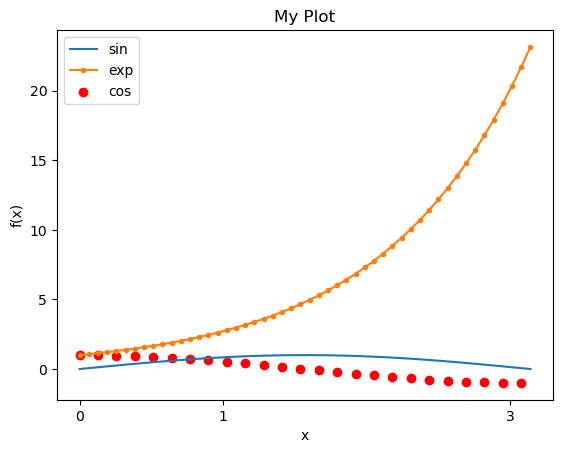

In [18]:
""" First, we plot the sin function """
fig, ax = plt.subplots()                     #First, we make the plot...
ax.plot(data_range,sin_vals,                 #and plot the function on the axis
        label='sin')                         #We label this plot for later.

""" Next, we add axis labels """
ax.set_xlabel('x')                           #There is a specific function for this....
ax.set(ylabel='f(x)')                        #or we can use the catch-all 'ax.set'

""" We can add another function, """
ax.plot(data_range,np.exp(data_range),
        marker='.',label='exp')              #We can add a marker at the points we actually
                                             #evaluate our data at
""" and even a third """
ax.scatter(data_range[::2],
           np.cos(data_range[::2]),          #We can also make a scatter plot, with no connecting lines
           color='red',label='cos')          #We are free to specify the color as well

""" For readability, add extra text """
ax.legend()                                  #The legend is constructed using the labels we wrote above
ax.set(title='My Plot')                      #And, the title is usually helpful

""" Extra stuff, because we can """
ax.set(xticks=(0,1,3))                       #Pyplot is usually pretty good with plot ticks,
                                             #but you can change them

#ax.set(yscale='log')                         #Plotting things on a log scale is useful if you have exponential
#                                             #growth/decay

There's an enormous amount of freedom you have when making such a plot. You can:

- Change the tick marks
- Change the x/y scale
- Change fonts and font sizes
- Add error bars
- Fill in a region between two curves
- Add multiple legends
- Label points
- Add gridlines
- Add a zoomed-in inset
- Adjust the aspect ratio

This is far from an exhaustive list. There are even packages you can import that change the style of the plot completely, such as https://github.com/garrettj403/SciencePlots:

[[<matplotlib.axis.XTick at 0x7fa89c1e7b10>,

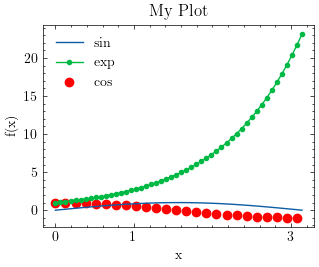

In [19]:
import scienceplots
plt.style.use('science')                     #This sets the style to use, globally (for the entire notebook)

""" First, we plot the sin function """
fig, ax = plt.subplots()                     #Makes the plot
ax.plot(data_range,sin_vals,                 #Plots the function on the axis
        label='sin')                         #We label this plot for later.

""" Next, we add axis labels """
ax.set_xlabel('x')                           #There is a specific function for this....
ax.set(ylabel='f(x)')                        #or we can use the catch-all 'ax.set'

""" We can add another function, """
ax.plot(data_range,np.exp(data_range),
        marker='.',label='exp')              #We can add a marker at the points we actually
                                             #evaluate our data at
""" and even a third """
ax.scatter(data_range[::2],
           np.cos(data_range[::2]),          #We can also make a scatter plot, with no connecting lines
           color='red',label='cos')          #We are free to specify the color as well

""" For readability, add extra text """
ax.legend()                                  #The legend is constructed using the labels we wrote above
ax.set(title='My Plot')                      #And, the title is usually helpful

""" Extra stuff, because we can """
ax.set(xticks=(0,1,3))                       #Pyplot is usually pretty good with plot ticks,
                                             #but you can change them

#ax.set(yscale='log')                         #Plotting things on a log scale is useful if you have exponential
#                                             #growth/decay

If you don't like the style, you can reset the style parameters:

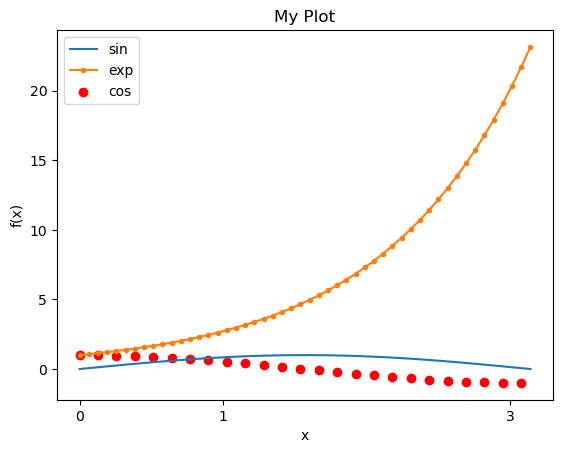

In [20]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

""" First, we plot the sin function """
fig, ax = plt.subplots()                     #Makes the plot
ax.plot(data_range,sin_vals,                 #Plots the function on the axis
        label='sin')                         #We label this plot for later.

""" Next, we add axis labels """
ax.set_xlabel('x')                           #There is a specific function for this....
ax.set(ylabel='f(x)')                        #or we can use the catch-all 'ax.set'

""" We can add another function, """
ax.plot(data_range,np.exp(data_range),
        marker='.',label='exp')              #We can add a marker at the points we actually
                                             #evaluate our data at
""" and even a third """
ax.scatter(data_range[::2],
           np.cos(data_range[::2]),          #We can also make a scatter plot, with no connecting lines
           color='red',label='cos')          #We are free to specify the color as well

""" For readability, add extra text """
ax.legend()                                  #The legend is constructed using the labels we wrote above
ax.set(title='My Plot')                      #And, the title is usually helpful

""" Extra stuff, because we can """
ax.set(xticks=(0,1,3))                       #Pyplot is usually pretty good with plot ticks,
                                             #but you can change them

#ax.set(yscale='log')                         #Plotting things on a log scale is useful if you have exponential
#                                             #growth/decay

plt.show()                                   #Sometimes this is necessary for iPython to actually display the result

There are many, many, *many* other things you can do. I expect you'll see a number of these applications in future notebooks. Matplotlib also has a large number of examples that I recommend looking through, some of which are listed below:

- Histogram: https://matplotlib.org/stable/gallery/lines_bars_and_markers/filled_step.html
- Contour plot: https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html
- 3D plot: https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

These resources are all found at https://matplotlib.org/stable/gallery/index.html, along with an incredible number of existing examples. Incidentally, Pablo has had great luck using ChatGPT to generate plotting code, so you might try that as well. And, of course - ask around!

## Interactive Plots

The last thing I'll touch on briefly is interactive plots, using plotly. You'll see this example again when we discuss Taylor series' (so if you don't understand something, don't worry about it), but it's a nice introduction to what plotly can do:

In [22]:
#Imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def taylor_series_sin(x, n_terms):
    """
    Calculate the Taylor series approximation of sin(x) up to n_terms terms.
    """
    approximation = np.zeros_like(x)
    for n in range(n_terms):
        coefficient = ((-1)**n) / np.math.factorial(2*n + 1)
        term = coefficient * (x**(2*n + 1))
        approximation += term
    return approximation

# Define the x values
x = np.linspace(-10, 10, 400)
# Calculate the true values of sin(x)
y_true = np.sin(x)

# Create the initial figure
fig = make_subplots(rows=1, cols=1)

# Add the true sin(x) function
fig.add_trace(go.Scatter(x=x, y=y_true, mode='lines', name='sin(x)'))

# Add initial Taylor series approximation with n_terms = 1
y_approx = taylor_series_sin(x, 1)
taylor_trace = go.Scatter(x=x, y=y_approx, mode='lines', name=f'Taylor Series Approx. (n=1)')
fig.add_trace(taylor_trace)

# Update function for sliders
steps = []
for n in range(1, 21):
    y_approx = taylor_series_sin(x, n)
    step = dict(
        method='update',
        args=[{'y': [y_true, y_approx]},
              {'title': f'Taylor Series Approximation of sin(x) with {n} terms'}],
        label=f'{n}'
    )
    steps.append(step)

# The slider takes in a list of values - one for each point on the slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Number of terms: "},
    pad={"t": 50},
    steps=steps
)]

# Fix the x and y axes ranges
fig.update_layout(
    title='Taylor Series Approximation of sin(x)',
    xaxis=dict(title='x', range=[-10, 10]),
    yaxis=dict(title='y', range=[-1.5, 1.5]),
    sliders=sliders
)

fig.show()

Thanks to Josh Wylie for writing that code snippet. You can add multiple sliders, and many of the options in matplotlib are also possible in plotly. Once again, I would suggest looking through the examples (see https://plotly.com/python/) to see what's possible - it's far better written than any examples I can come up with for this notebook!

## Resources

There are far too many packages that exist for me to go through them all. Instead, I will list some of the common ones and their use cases, grouped sort of by use case.

General utilities:
- os: operating system actions (making folders, checking if a file exists, etc.)
- sys: system-specific operations (where Python should look for packages, etc.)
- shutil: file operations (copying/moving files, like in the terminal, etc.)
- glob: finding files by pattern matching

Scientific computing:
- numpy
- scikit-learn: machine learning (regression, clustering, classification, etc.)
- scipy: general scientific computing (special functions, optimization, integration, interpolation, etc.)

Plotting:
- matplotlib
- plotly: interactive plots, 3d plots, etc.

File input/output:
- h5py: HDF5 file format, which is binary-like (somewhat compact), implemented in many different programming languages, simple to use
- pandas: for tabular data, written in human-readable file, easily handles weirldy-formatted data

Other:
- multiprocessing: for running code using multiple CPU cores (see also multiprocess)
- jax: just-in-time compilation that can speed up some code, lets you run on GPUs easily
- dash: making interactive websites (see e.g. https://bmex.dev/masses as an example)